本篇notebook用于使用整理好的所有数据，用以可视化分析，并得出有参考性的结论

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 加载数据

In [591]:
df = pd.read_csv('../../data/processed/Total_data.csv')
df.head()

Unnamed: 0  Unnamed: 0_x            steamid  communityvisibilitystate  \
0           0             0  76561197960269904                         3   
1           1             1  76561197960280448                         3   
2           2             2  76561197960290464                         3   
3           3             3  76561197960315952                         3   
4           4             4  76561197960331200                         3   

   profilestate  personaname  \
0             1         ツxxツ   
1             1        recon   
2             1         JKBe   
3             1  chuNami5000   
4             1        Mikki   

                                          profileurl  \
0               https://steamcommunity.com/id/xcari/   
1             https://steamcommunity.com/id/pzrecon/   
2  https://steamcommunity.com/profiles/7656119796...   
3             https://steamcommunity.com/id/chuNk--/   
4  https://steamcommunity.com/profiles/7656119796...   

                                              avatar  \
0  https://avatars.steamstatic.com/c8499ee4d5ebde...   
1  https://avatars.steamstatic.com/628974cb0fcec1...   
2  https://avatars.steamstatic.com/c698ae39dd85c1...   
3  https://avatars.steamstatic.com/b16314c3aff86b...   
4  https://avatars.steamstatic.com/fef49e7fa7e199...   

                                        avatarmedium  \
0  https://avatars.steamstatic.com/c8499ee4d5ebde...   
1  https://avatars.steamstatic.com/628974cb0fcec1...   
2  https://avatars.steamstatic.com/c698ae39dd85c1...   
3  https://avatars.steamstatic.com/b16314c3aff86b...   
4  https://avatars.steamstatic.com/fef49e7fa7e199...   

                                          avatarfull  ...  \
0  https://avatars.steamstatic.com/c8499ee4d5ebde...  ...   
1  https://avatars.steamstatic.com/628974cb0fcec1...  ...   
2  https://avatars.steamstatic.com/c698ae39dd85c1...  ...   
3  https://avatars.steamstatic.com/b16314c3aff86b...  ...   
4  https://avatars.steamstatic.com/fef49e7fa7e199...  ...   

  Sports_weighted_playtime (in_minutes)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                           1205.847002   
4                                   NaN   

   MassivelyMultiplayer_weighted_playtime (in_minutes)  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                0.0     
4                                                NaN     

   RPG_weighted_playtime (in_minutes) Strategy_weighted_playtime (in_minutes)  \
0                                 NaN                                     NaN   
1                                 NaN                                     NaN   
2                                 NaN                                     NaN   
3                                 0.0                                     0.0   
4                                 NaN                                     NaN   

   Casual_weighted_playtime (in_minutes) total_price(dollar)  \
0                                    NaN                 NaN   
1                                    NaN                 NaN   
2                                    NaN                 NaN   
3                                    0.0               145.0   
4                                    NaN                 NaN   

   Principal Component 1  Principal Component 2 Principal Component 3  \
0                    NaN                    NaN                   NaN   
1                    NaN                    NaN                   NaN   
2                    NaN                    NaN                   NaN   
3               0.269893              -2.917473             -0.245029   
4                    NaN                    NaN                   NaN   

   Cluster_Labels  
0             NaN  
1             Na

In [592]:
'''提取表格列信息，方便后续数据查阅并提取'''
# for idx, key in enumerate(df.columns):  
#     print(f'{idx}:{key}', end=' ')  # 使用 end=' ' 使得输出不自动换行
#     if (idx + 1) % 5 == 0:  # 每5个元素后换行
#         print()  # 执行换行操作

'提取表格列信息，方便后续数据查阅并提取'

### 预设sns默认设置

In [593]:
sns.set(
    context="notebook", # 设置整体类型
    style="whitegrid", # 设置背景格式
    palette="muted", 
    font="Times New Roman", # 设置字体类型
    font_scale=1.3, # 设置text的字体大小
    color_codes=True, # 启用颜色代码
    rc={                                # run command
    'figure.figsize': (20, 8),          # 图表尺寸
    'figure.dpi': 300,                  # 设置清晰度Dot per inch
    'axes.titlesize': 20,               # 坐标轴标题字体大小
    'axes.labelsize': 14,               # 坐标轴标签字体大小
    'xtick.labelsize': 12,              # x轴刻度标签字体大小
    'ytick.labelsize': 12,              # y轴刻度标签字体大小
    'grid.color': 'grey',               # 网格线颜色
    'grid.linestyle': '--',             # 网格线样式
    'lines.linewidth': 2,               # 线条宽度
    'lines.markersize': 6               # 标记大小
} 
)

### 单维度数据可视化——基础图形

#### 1. 理解玩家国籍分布情况

In [594]:
country_se = df['loccountrycode'] # 提取国籍列
grouped_country_se = country_se.groupby(country_se).agg( ['count'])  # 将country_se数据按国籍聚类
grouped_country_se = grouped_country_se.reset_index().sort_values(by='count', ascending= False).reset_index(drop=True) # 将country_se数据数据扁平化，排序并重新整理index
grouped_country_top_30_se = grouped_country_se.head(30) #提取前30列用于可视化

In [595]:
grouped_country_se # 展示国籍分布情况，可以看到共有220个国籍（除去未知）

loccountrycode  count
0          Unknown   8416
1               FI   1889
2               US   1759
3               SE   1202
4               AU   1042
..             ...    ...
216             GY      1
217             TL      1
218             TO      1
219             NU      1
220             KW      1

[221 rows x 2 columns]

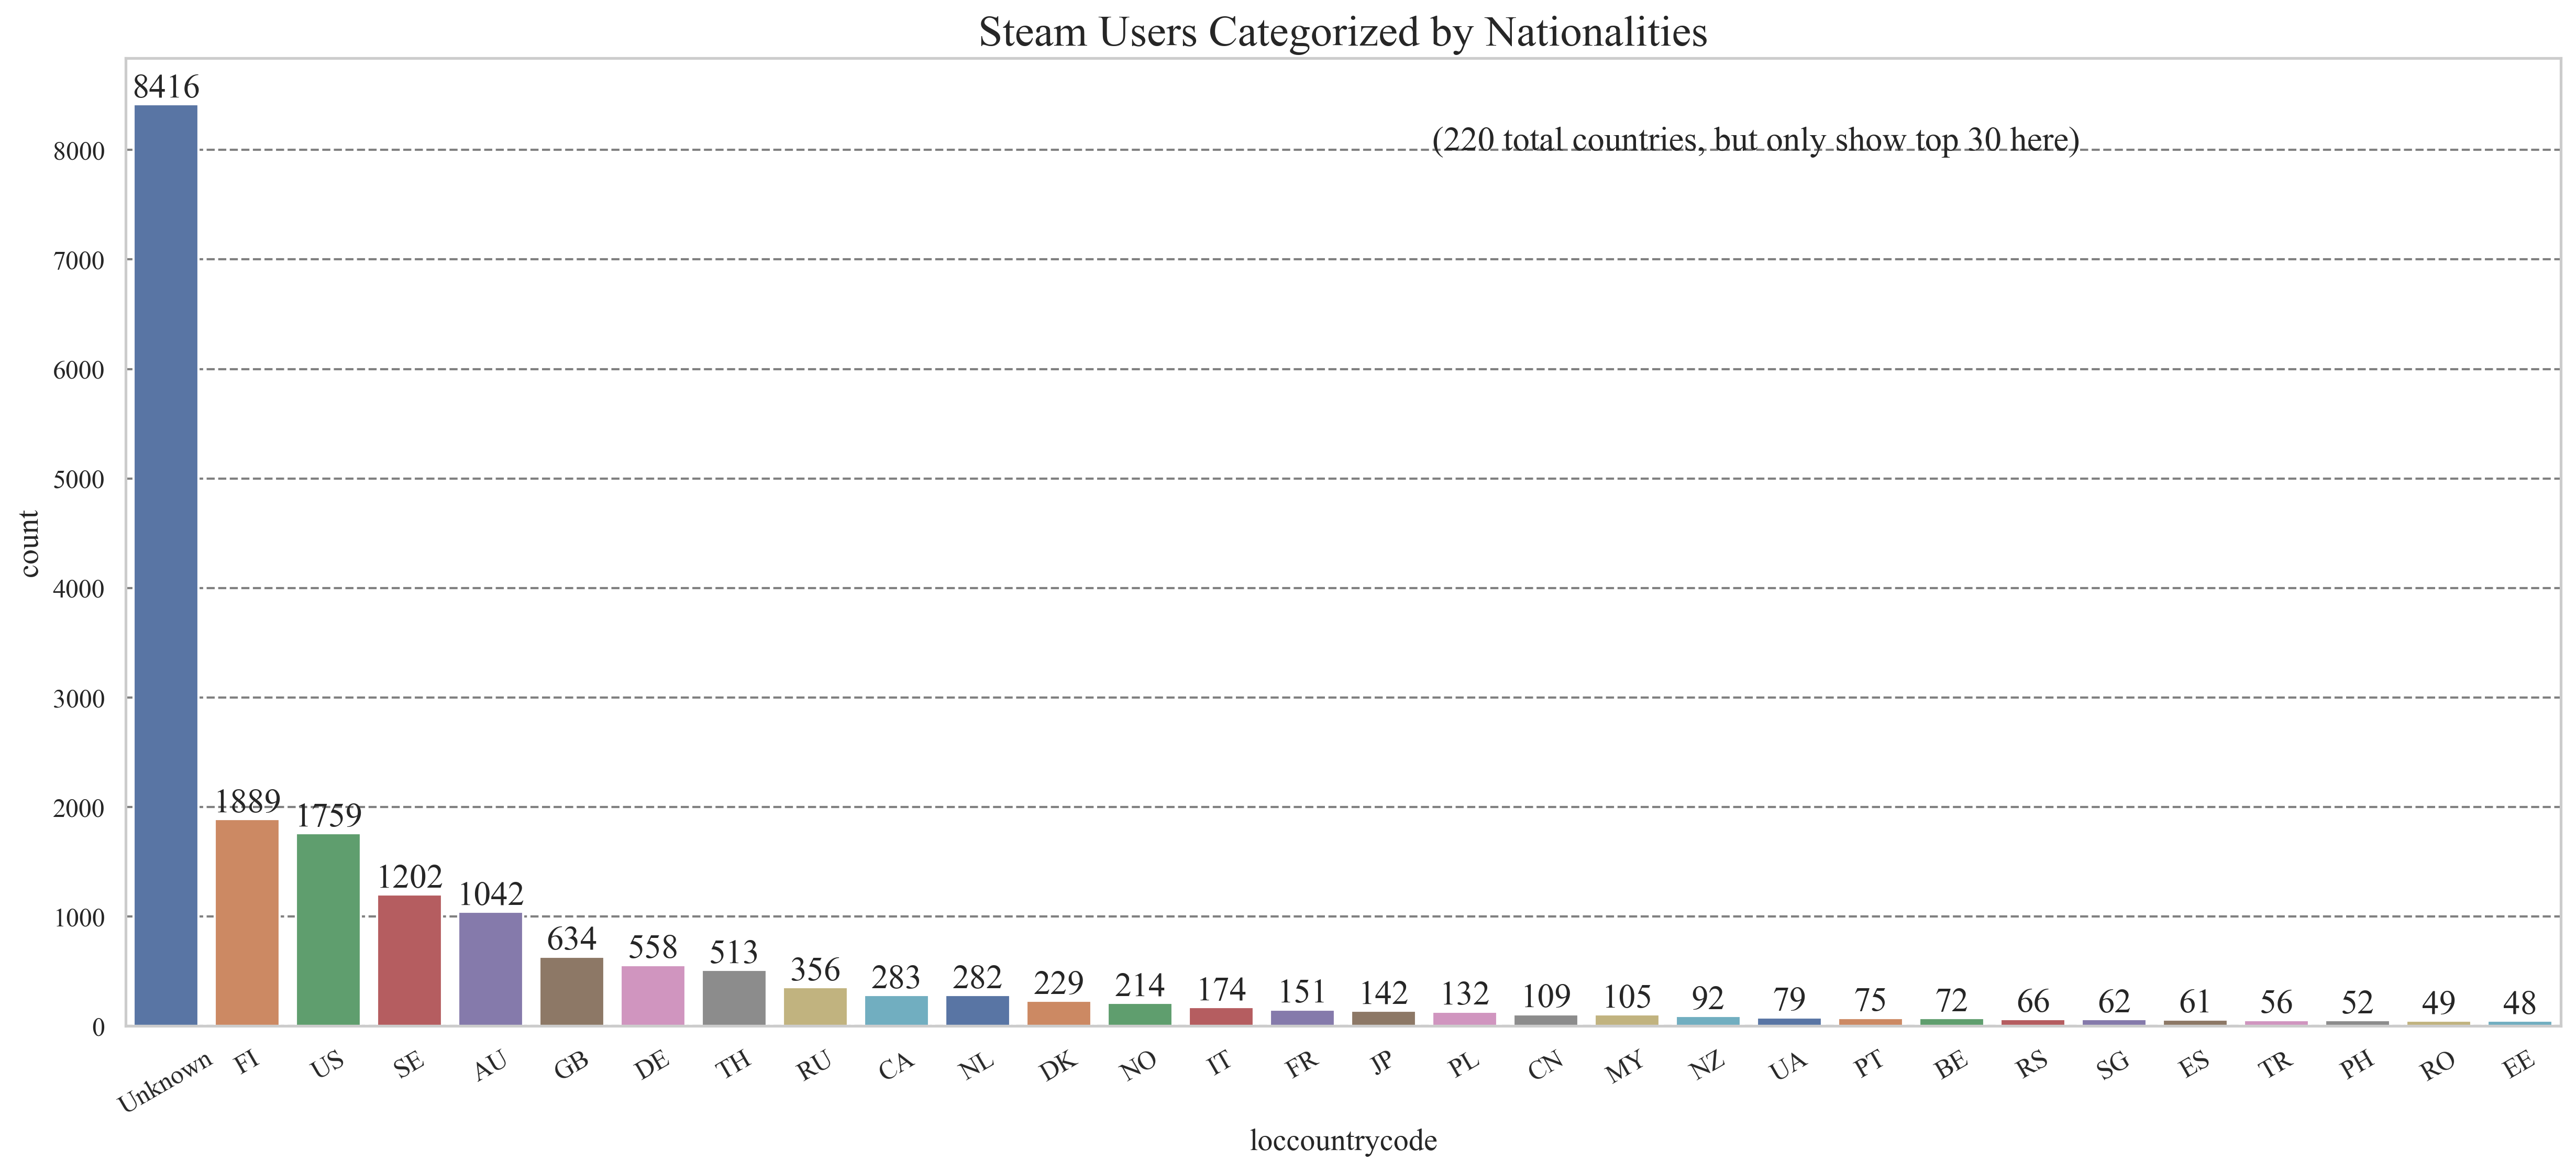

In [596]:
'''绘制柱形图'''

plt.xticks(rotation = 30) # 旋转横轴文字说明
plt.title(label='Steam Users Categorized by Nationalities')
ax = sns.barplot(data=grouped_country_top_30_se, x= 'loccountrycode', y= 'count', hue='loccountrycode', palette='deep')

# 添加注解
ax.text(x= 15.6, y= 8000, s = '(220 total countries, but only show top 30 here)')
for bar in ax.patches:  # ax.patches是条形图的集合
    ax.text(x = bar.get_x() + bar.get_width() / 2,  # x坐标，条形图中心
            y = bar.get_height(),  # y坐标，条形图顶部
            s = int(bar.get_height()),  # 标签，即条形图的高度，转换为整数
            ha='center',  # 水平居中,Horizontal Alignment（水平对齐）
            va='bottom')  # 从条形图顶部向下对齐,Vertical Alignment（垂直对齐）


总结如下结论：
-   **未知国家**：有8416名玩家的国籍为“Unknown”，占据了最大的一部分。这表明在数据收集中有大量的玩家缺少地理位置信息。
-   **靠前国家**：前十位分别为芬兰、美国、瑞典、澳大利亚、英国、德国、俄罗斯、加拿大、荷兰。这表明此次'random search'仍然存在一定区域性的偏差（更偏向于欧美市场），而不是更为全球化，因此后续的用户聚类识别得出的结论，更适合在这些国家做后续的市场营销与推广。


#### 2. 识别玩家创建日期

In [597]:
timecreated_se = pd.to_datetime(df['timecreated']) # 将原始数据转换为datetime
timecreated_se = timecreated_se.dt.year # 将数据转换为year
timecreated_se.dropna(inplace=True) # 剔除空值数据，以免无法转换为int
timecreated_se = timecreated_se.astype(int) 
timecreated_se = timecreated_se.groupby(by=timecreated_se).size() # 每组中的行数

C:\Users\55386\AppData\Local\Temp\ipykernel_12448\4047191101.py:3: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  timecreated_se.dropna(inplace=True) # 剔除空值数据，以免无法转换为int


In [598]:
timecreated_df = pd.DataFrame(timecreated_se) # sns只能接受dataframe进行绘制
timecreated_df.columns = ['total_counts'] # 更名，避免reset_index列名冲突
timecreated_df.reset_index(inplace= True) # 将index转换为列

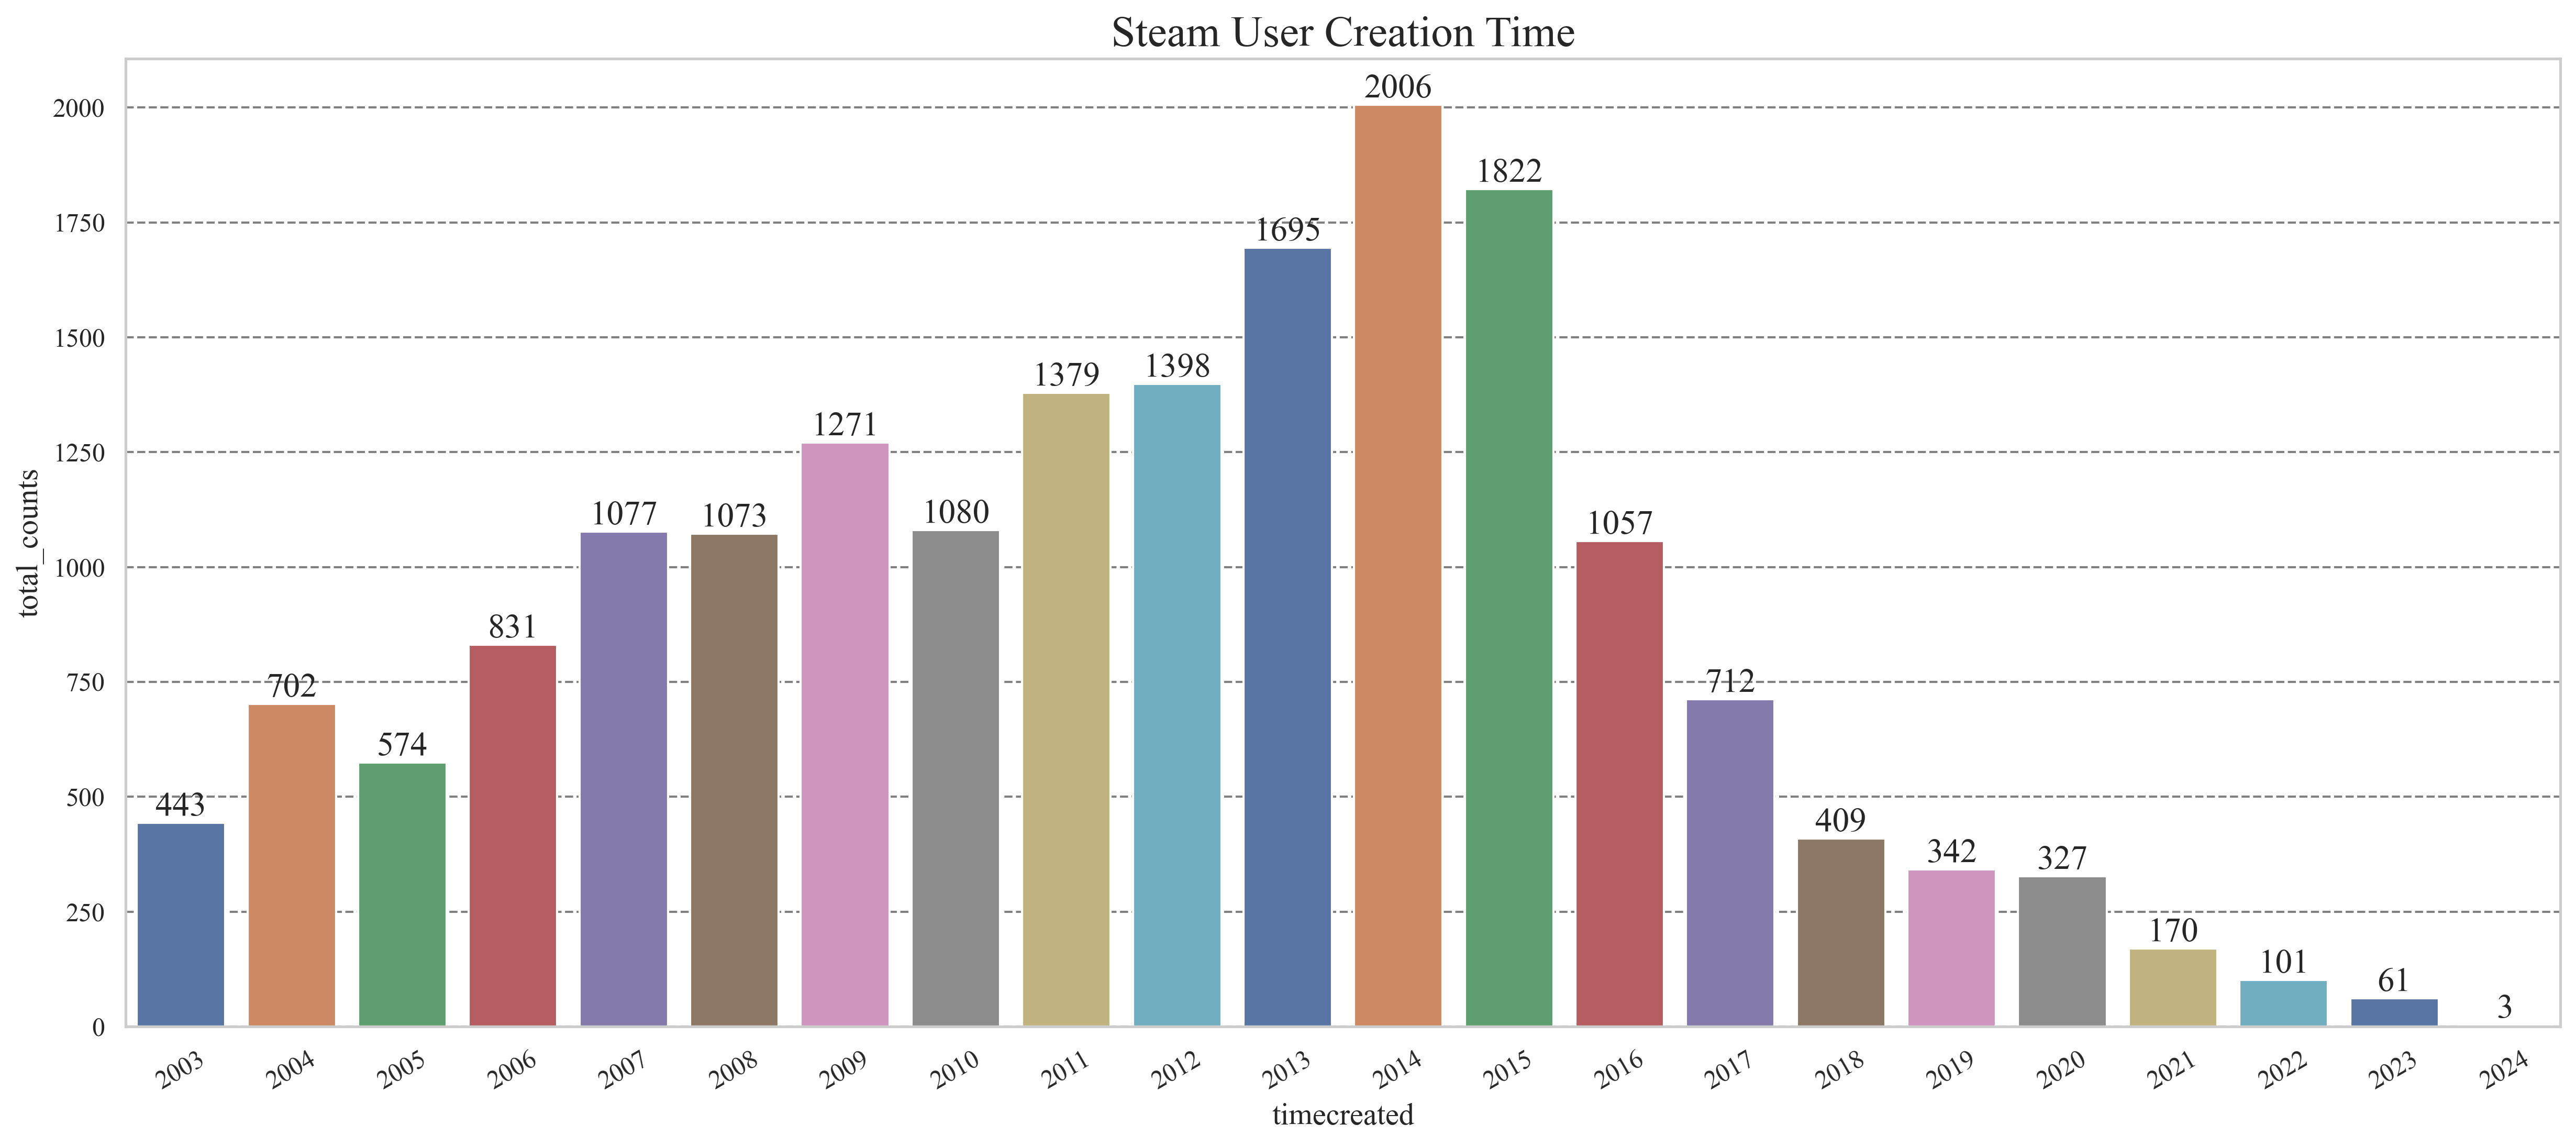

In [599]:
'''绘制柱形图'''

plt.xticks(rotation = 30) # 旋转横轴文字说明
plt.title(label='Steam User Creation Time')
ax = sns.barplot(data=timecreated_df, x= 'timecreated', y= 'total_counts', hue='timecreated', palette='deep',legend=False)

# 添加注解

for bar in ax.patches:  # ax.patches是条形图的集合
    ax.text(x = bar.get_x() + bar.get_width() / 2,  # x坐标，条形图中心
            y = bar.get_height(),  # y坐标，条形图顶部
            s = int(bar.get_height()),  # 标签，即条形图的高度，转换为整数
            ha='center',  # 水平居中,Horizontal Alignment（水平对齐）
            va='bottom')  # 从条形图顶部向下对齐,Vertical Alignment（垂直对齐）


总体有如下结论：
-   **用户增长趋势**：从2003年到2014年，用户创建数量总体呈现增长趋势。特别是2009年、2013年和2014年，这三年用户创建数量显著增加，分别达到1271、1695和2006。
-   **波动趋势**：在2014年达到峰值后，用户创建数量开始波动下降，特别是2017年以后，用户创建数量显著减少，当然这可能与数据抓取逻辑有关，由于检索初始点，均在2003-2007年之间，因此用户数据可能会受初始点影响，而偏向于更靠前一些。

#### 3. 识别玩家游戏数量

In [600]:
'''整理数据'''

game_count_se = df['game_count']
game_count_df = game_count_se.reset_index()

# 定义区间边界
bins = [-1, 0] + list(range(10, 810, 20)) + [float('inf')] # infinite

# 生成labels
labels = [f"{bins[i]+1}-{bins[i+1]}" for i in range(len(bins)-1)]
labels[0] = "0"  # 特别处理第一个标签，只包含0
labels[-1] = f"{bins[-2]+1}+"  # 处理最后一个标签，表示超过最后一个有限数的值

# 使用 cut 函数进行分区
game_count_df['groups'] = pd.cut(game_count_df['game_count'], bins=bins, labels=labels) 

game_count_df = game_count_df.groupby('groups').size()
game_count_df = game_count_df.reset_index()
game_count_df.columns = ['groups','counts']
game_count_df['groups'] = game_count_df['groups'].astype(str) # 将原先cut后的Categorical数据转换成普通str，使得后续的图片能够正常显示
game_count_df = game_count_df[game_count_df['groups'] != '0']

C:\Users\55386\AppData\Local\Temp\ipykernel_12448\3690847402.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  game_count_df = game_count_df.groupby('groups').size()


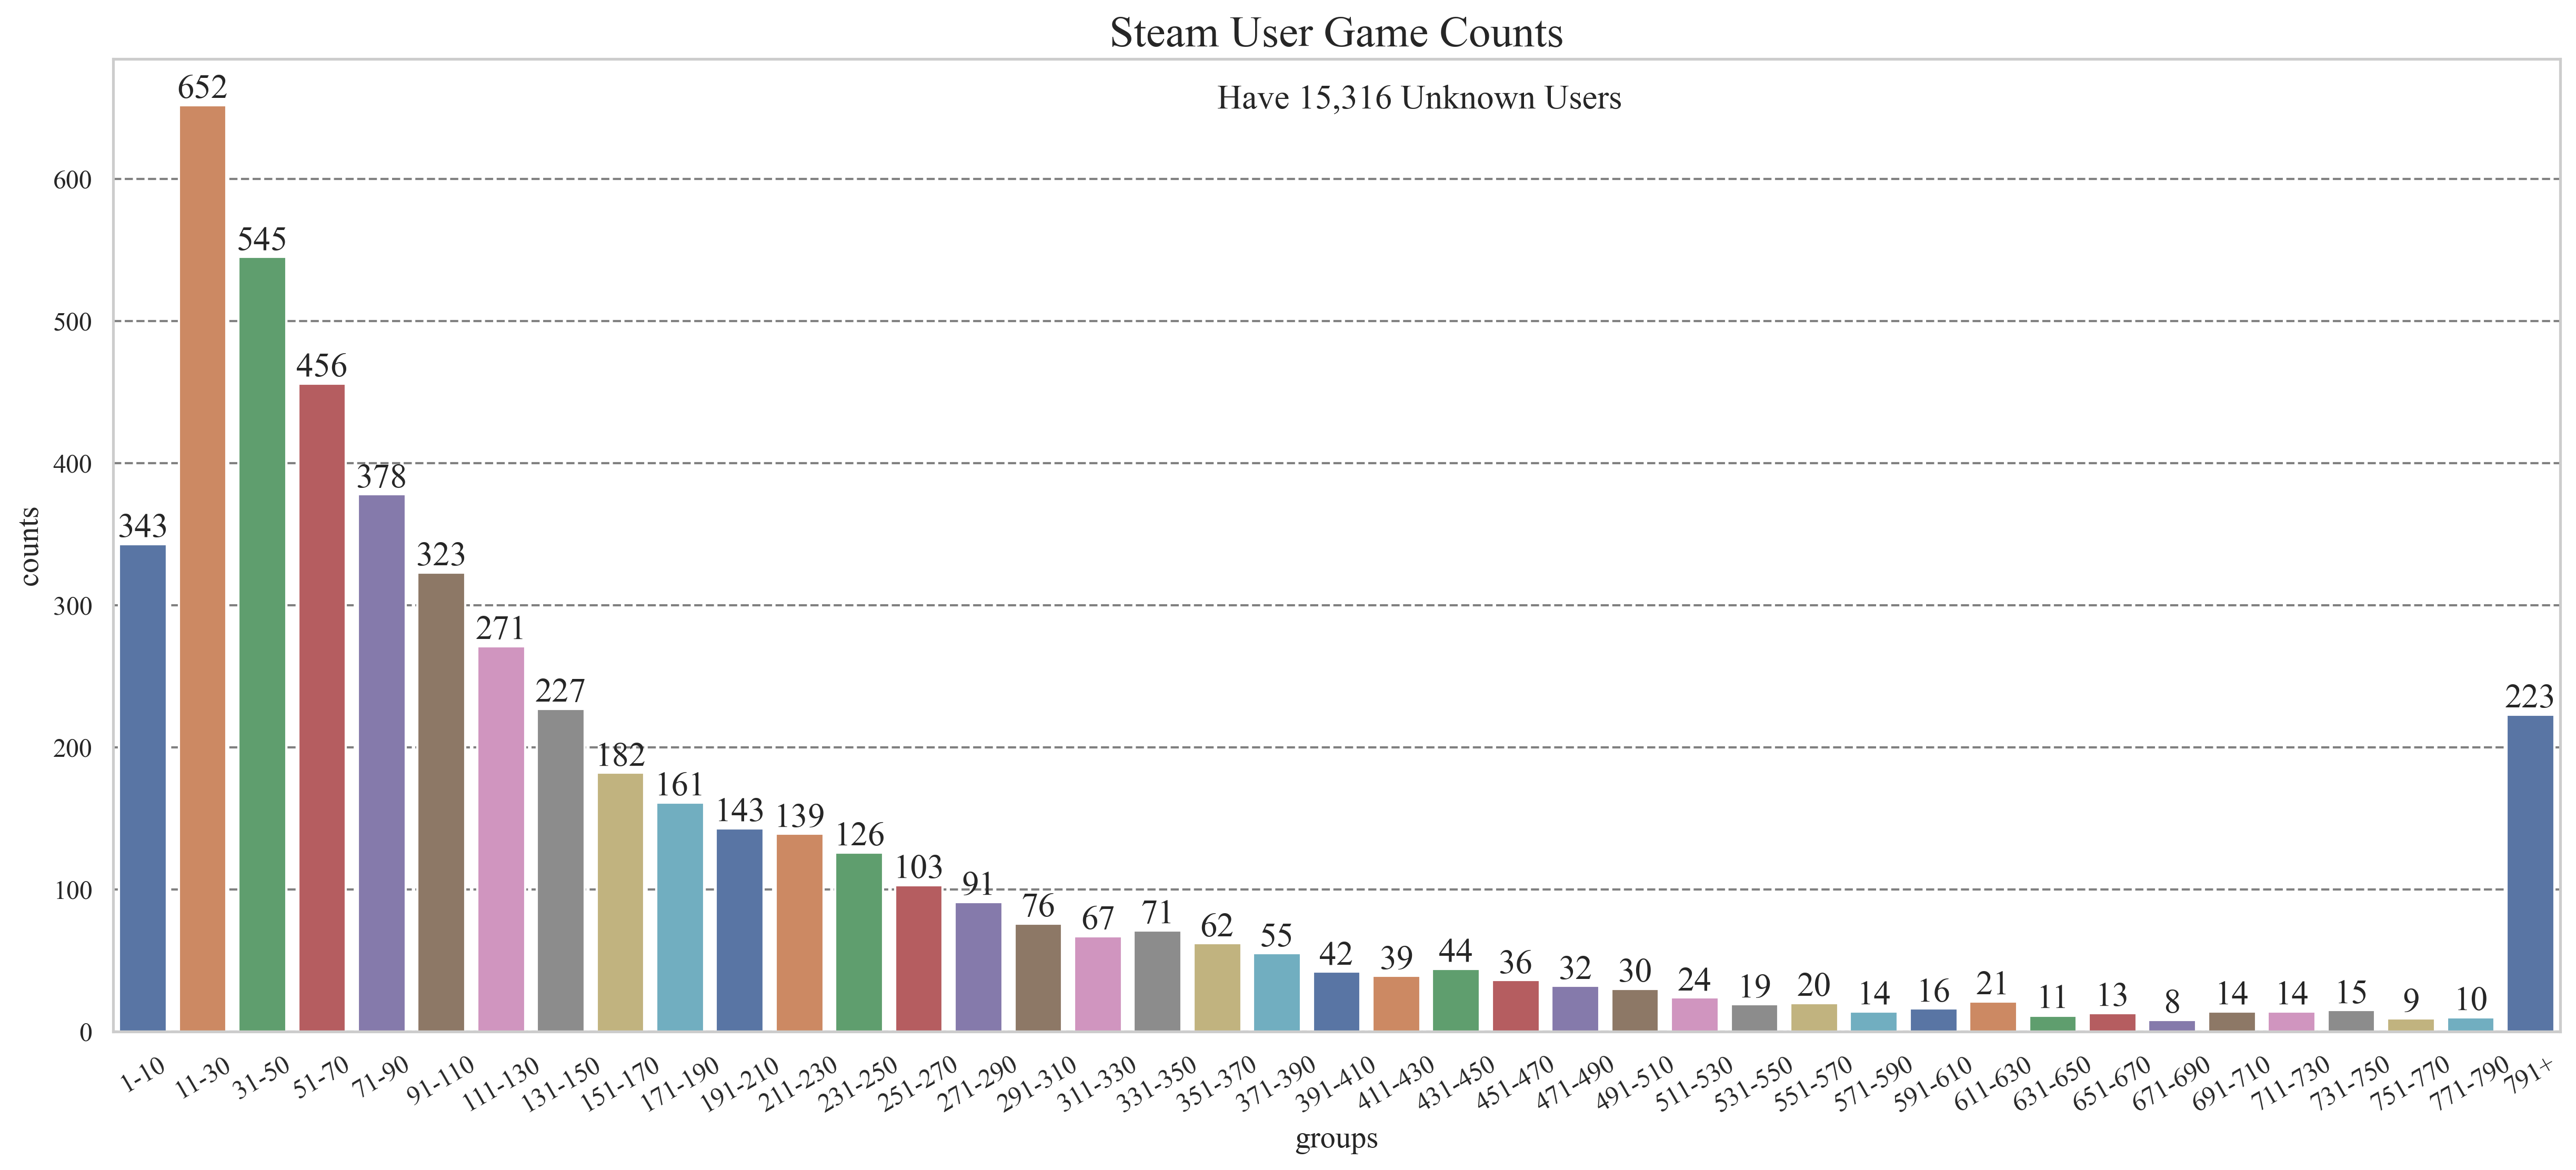

In [601]:
'''绘制柱形图'''

plt.xticks(rotation = 30) # 旋转横轴文字说明
plt.title(label='Steam User Game Counts')
ax = sns.barplot(data=game_count_df, x= 'groups', y= 'counts',hue='groups', palette='deep',legend=False)

# 添加注解
ax.text(x = 18, y = 650, s = 'Have 15,316 Unknown Users')
for bar in ax.patches:  # ax.patches是条形图的集合
    ax.text(x = bar.get_x() + bar.get_width() / 2,  # x坐标，条形图中心
            y = bar.get_height(),  # y坐标，条形图顶部
            s = int(bar.get_height()),  # 标签，即条形图的高度，转换为整数
            ha='center',  # 水平居中,Horizontal Alignment（水平对齐）
            va='bottom')  # 从条形图顶部向下对齐,Vertical Alignment（垂直对齐）


总体有如下结论：
-   **统计前提**：本次数据抓取前提条件是**付费游戏**。
-   **未知用户数量**：有15,316个未知用户（占比74.9%），这些用户设置了隐私权限且占比非常大，暂时无法判断这些用户属于哪些分组，这可能影响总体分析结果。
-   **游戏用户分布情况**：随游戏量增加，玩家数量越来越少，峰值出现在11-30分组。
-   **重度游戏玩家**：仍有相当一部分玩家游戏收藏数达到了400+（本人游戏数量为81），这是一个较高的数字，或许与国籍和账户创建时间有一定关系，待后续做回归分析。

#### 4. 识别有史以来最热门的游戏种类

In [602]:
# 使用正则表达式，其中"^"表示从字符串开始位置起，"?!"表示反向即不包含，"."表示任意字符，"*"表示任意数量，因此".*"表示任意字符任意数量，"|"表示逻辑与
game_info_before_tidy_up_df = df[[col for col in df.columns if re.search(r'^(?!.*2weeks)(name_game|playtime_forever_game|price_overview)', col)]]

In [603]:
# 将数据按照参数整理成三列
game_info_df = pd.DataFrame()
for i in range(0,len(game_info_before_tidy_up_df.columns),3):
    temp_df = game_info_before_tidy_up_df[game_info_before_tidy_up_df.columns[i:i+3]]
    temp_df.columns = ['game_name','playtime_foever_in_minutes','price_in_dollar']
    game_info_df = pd.concat([game_info_df,temp_df])

In [604]:
game_info_df = game_info_df[game_info_df['game_name'] != 'Unknown'] # 剔除Unknown数据

In [605]:
game_info_df
grouped_game_info_df = game_info_df.groupby('game_name')['playtime_foever_in_minutes'].sum().reset_index()

In [606]:
# 将数据聚类，并作统计分析
game_info_grouped_df = game_info_df.groupby('game_name').agg({
    'game_name':['count'],
    'playtime_foever_in_minutes':['mean','median','max','min','std'],
    'price_in_dollar':['mean']}
)
# 进行特征工程，创建新参数
game_info_grouped_df[('playtime_foever_in_minutes', 'coefficient of variation')] = game_info_grouped_df[('playtime_foever_in_minutes','std')]/game_info_grouped_df[('playtime_foever_in_minutes','mean')]

In [607]:
# 提取核心数据
game_info_sorted_df = game_info_grouped_df[[('game_name', 'count'),('playtime_foever_in_minutes', 'median'),('price_in_dollar','mean')]]
game_info_sorted_df.columns = ['count','playtime_foever_in_minutes(median)','price_in_dollar']
sorted_flat_df = game_info_sorted_df.reset_index()

In [608]:
top_hotest_games = sorted_flat_df.nlargest(20,'count')

In [609]:
top_hotest_games

game_name  count  playtime_foever_in_minutes(median)  \
374              Counter-Strike2   3246                             91152.0   
1348          PUBG:BATTLEGROUNDS   1274                             22659.0   
828              GrandTheftAutoV    702                             16382.5   
1561                        Rust    564                             33796.5   
377        Counter-Strike:Source    550                             28837.0   
373               Counter-Strike    537                             10232.0   
788                   Garry'sMod    536                             30030.0   
1982  TomClancy'sRainbowSixSiege    456                             24738.5   
1540                RocketLeague    452                             42574.5   
92                   ApexLegends    380                             15927.0   
1860                    Terraria    371                             21072.0   
2145                    Warframe    268                             36458.0   
470               DeadbyDaylight    251                             22542.0   
2227              Z1BattleRoyale    248                             12442.5   
1364                 PathofExile    236                             46121.5   
103                        Arma3    235                             34211.0   
451                         DayZ    223                             29406.0   
489                     Destiny2    194                             28127.5   
1535              RivalsofAether    192                             82551.5   
2142                  WarThunder    190                             28780.0   

      price_in_dollar  
374               0.0  
1348              0.0  
828               0.0  
1561             39.0  
377               9.0  
373               9.0  
788               4.0  
1982             19.0  
1540              0.0  
92                0.0  
1860              9.0  
2145              0.0  
470              19.0  
2227              0.0  
1364              0.0  
103              29.0  
451              26.0  
489               0.0  
1535             29.0  
2142              0.0

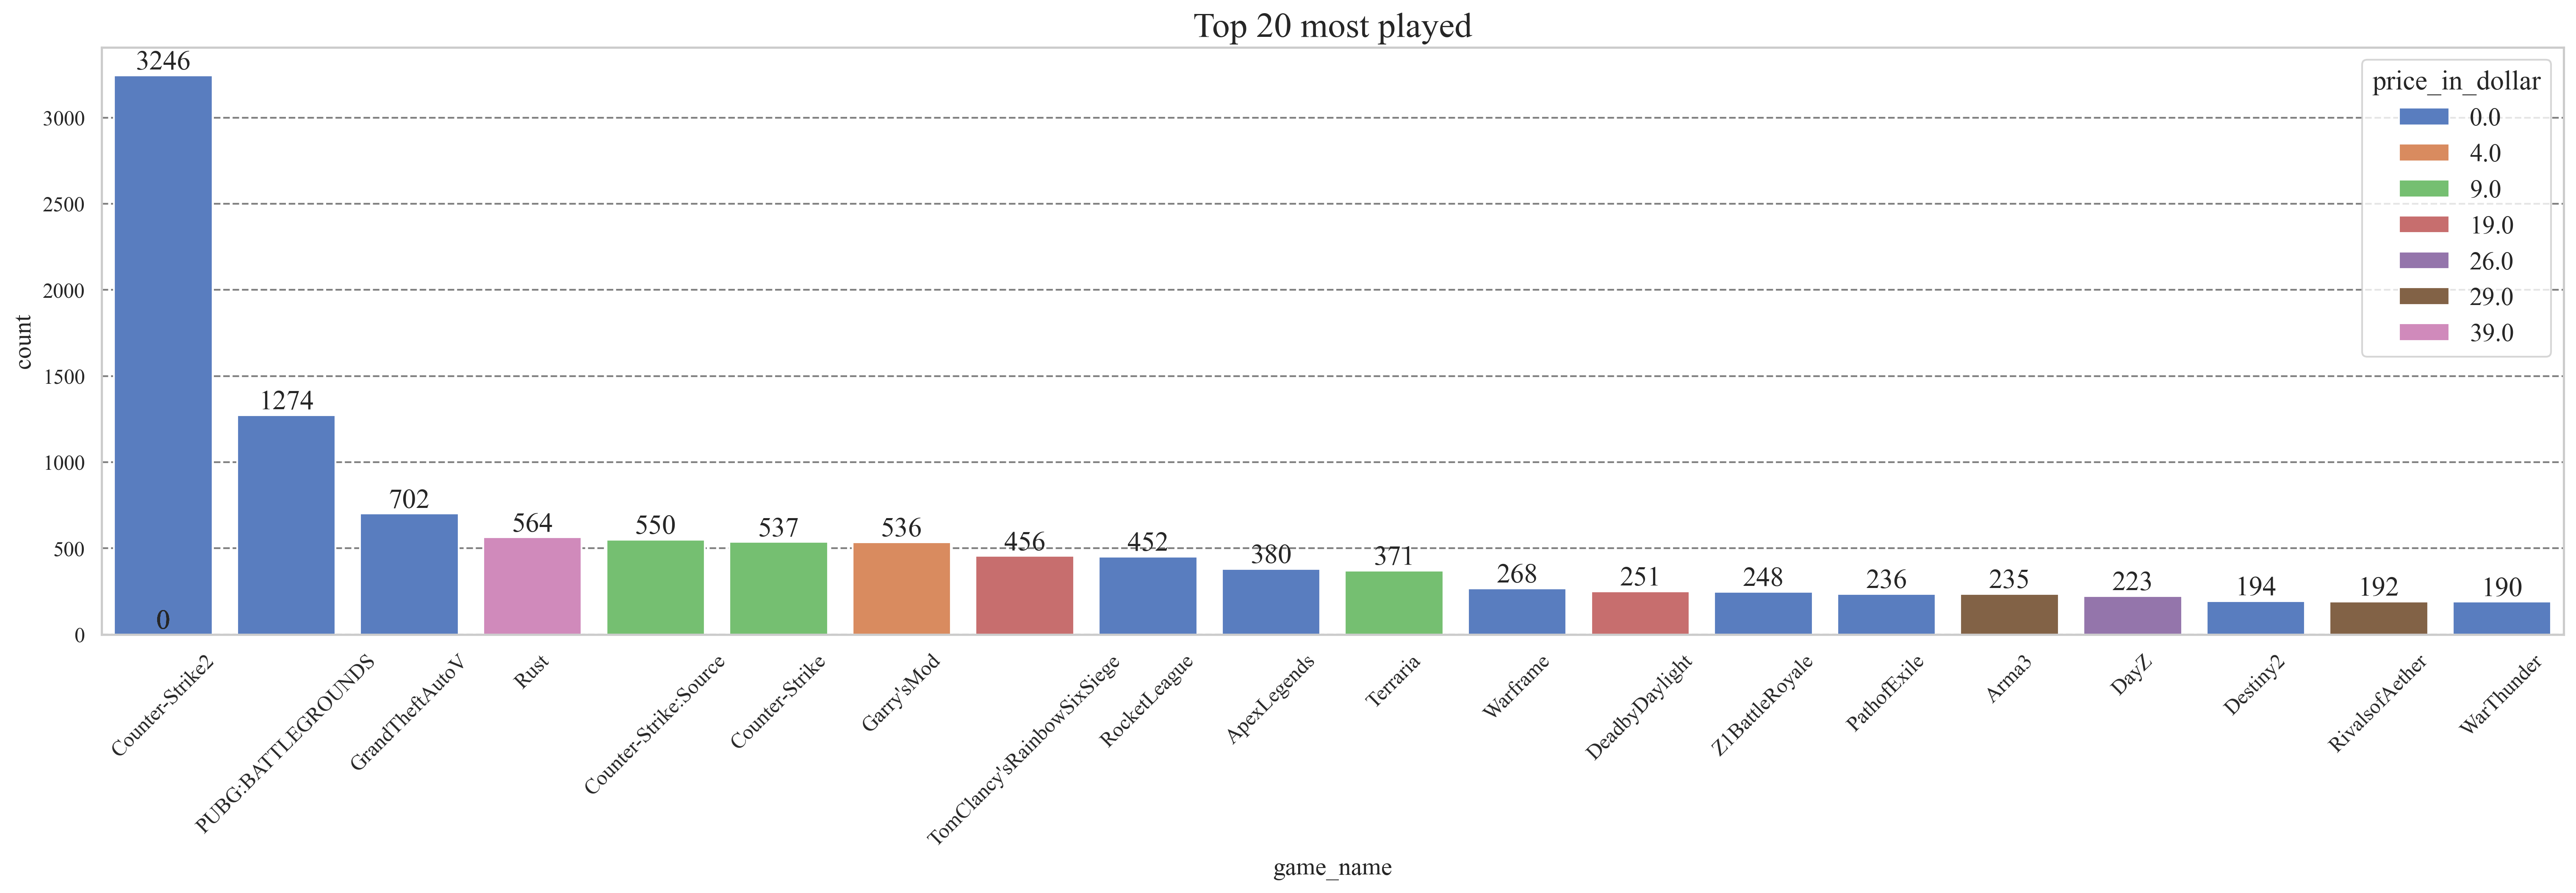

In [610]:
# 排序后查阅前20个游戏的上榜次数
plt.figure(figsize=(25,6))
plt.xticks(rotation = 45)
plt.title('Top 20 most played')
ax = sns.barplot(data=top_hotest_games, x='game_name',y='count',hue='price_in_dollar',palette='muted',)

# 添加数签
for bar in ax.patches:  # ax.patches是条形图的集合
    ax.text(x = bar.get_x() + bar.get_width() / 2,  # x坐标，条形图中心
            y = bar.get_height(),  # y坐标，条形图顶部
            s = int(bar.get_height()),  # 标签，即条形图的高度，转换为整数
            ha='center',  # 水平居中,Horizontal Alignment（水平对齐）
            va='bottom')  # 从条形图顶部向下对齐,Vertical Alignment（垂直对齐）

<Axes: title={'center': 'Playtime Distribution of Top 20 Games'}, xlabel='playtime_foever_in_minutes', ylabel='game_name'>

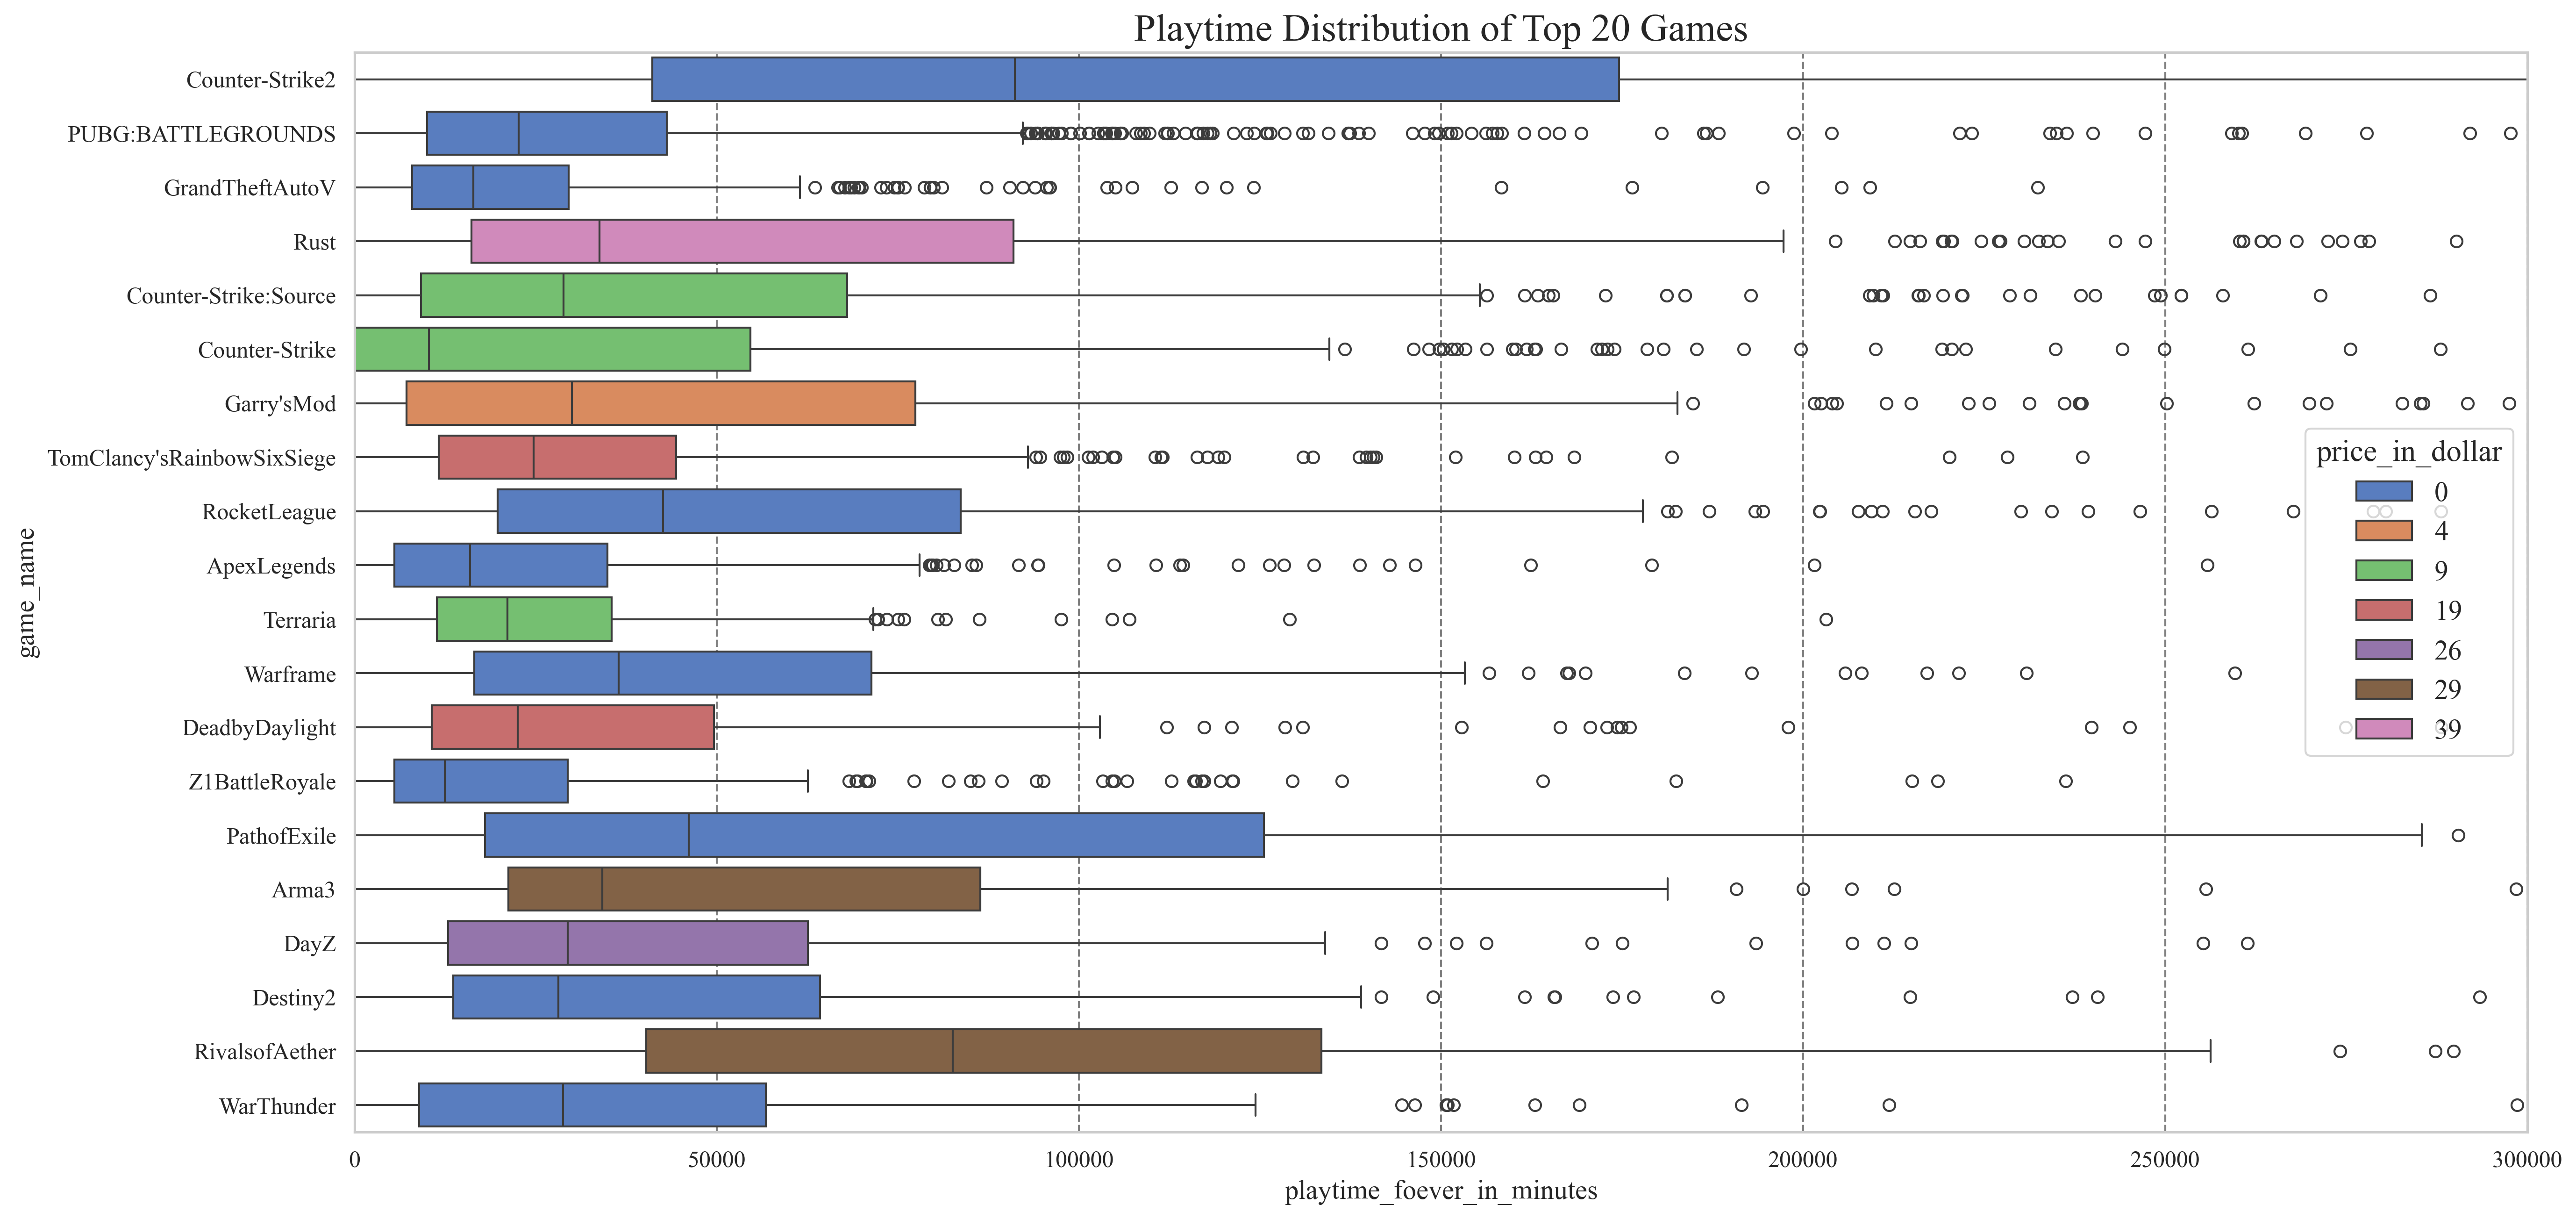

In [611]:
# 绘制箱型图，

# filter所有数据中排在counts前20的
top_20_games_data = game_info_df[game_info_df['game_name'].isin(top_hotest_games['game_name'])]
# 定义顺序，按照counts的大小从上到下依次排序
y_order = top_hotest_games['game_name']

plt.figure(figsize=(20, 10))
plt.title('Playtime Distribution of Top 20 Games')
plt.xlim(0, 300000)
sns.boxplot(data=top_20_games_data, x='playtime_foever_in_minutes', y='game_name', hue='price_in_dollar',palette='muted',order=y_order)

In [612]:
top_hotest_games

game_name  count  playtime_foever_in_minutes(median)  \
374              Counter-Strike2   3246                             91152.0   
1348          PUBG:BATTLEGROUNDS   1274                             22659.0   
828              GrandTheftAutoV    702                             16382.5   
1561                        Rust    564                             33796.5   
377        Counter-Strike:Source    550                             28837.0   
373               Counter-Strike    537                             10232.0   
788                   Garry'sMod    536                             30030.0   
1982  TomClancy'sRainbowSixSiege    456                             24738.5   
1540                RocketLeague    452                             42574.5   
92                   ApexLegends    380                             15927.0   
1860                    Terraria    371                             21072.0   
2145                    Warframe    268                             36458.0   
470               DeadbyDaylight    251                             22542.0   
2227              Z1BattleRoyale    248                             12442.5   
1364                 PathofExile    236                             46121.5   
103                        Arma3    235                             34211.0   
451                         DayZ    223                             29406.0   
489                     Destiny2    194                             28127.5   
1535              RivalsofAether    192                             82551.5   
2142                  WarThunder    190                             28780.0   

      price_in_dollar  
374               0.0  
1348              0.0  
828               0.0  
1561             39.0  
377               9.0  
373               9.0  
788               4.0  
1982             19.0  
1540              0.0  
92                0.0  
1860              9.0  
2145              0.0  
470              19.0  
2227              0.0  
1364              0.0  
103              29.0  
451              26.0  
489               0.0  
1535             29.0  
2142              0.0

In [613]:
sorted_flat_df = sorted_flat_df[sorted_flat_df['count']>5]
top_playtime_games = sorted_flat_df.nlargest(20,'playtime_foever_in_minutes(median)')

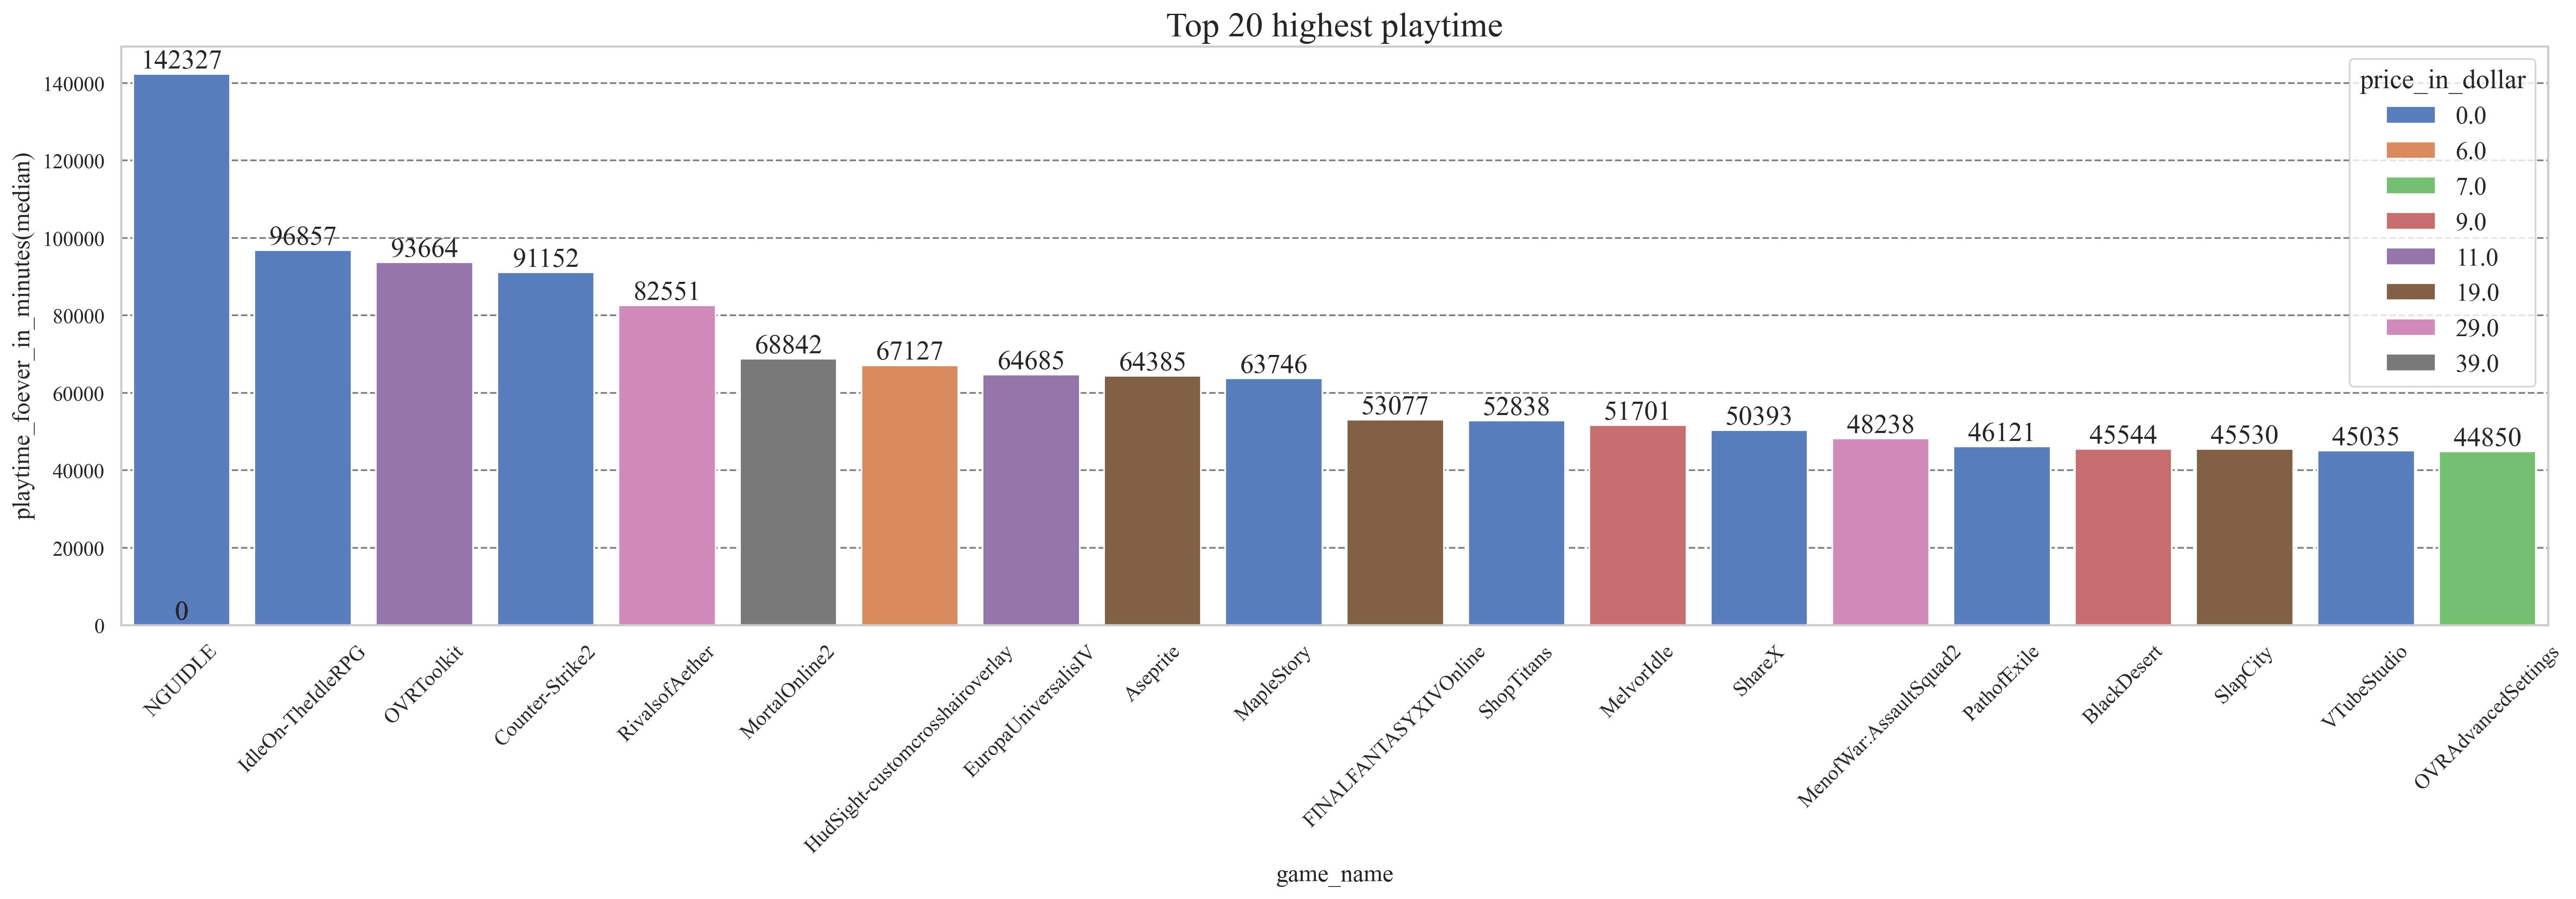

In [614]:
# 查阅前20热度游戏的游玩时间中位数情况
plt.figure(figsize=(25,6))
plt.xticks(rotation = 45)
plt.title('Top 20 highest playtime')
ax = sns.barplot(data=top_playtime_games, x='game_name',y='playtime_foever_in_minutes(median)',hue='price_in_dollar',palette='muted',)

# 添加数签
for bar in ax.patches:  # ax.patches是条形图的集合
    ax.text(x = bar.get_x() + bar.get_width() / 2,  # x坐标，条形图中心
            y = bar.get_height(),  # y坐标，条形图顶部
            s = int(bar.get_height()),  # 标签，即条形图的高度，转换为整数
            ha='center',  # 水平居中,Horizontal Alignment（水平对齐）
            va='bottom')  # 从条形图顶部向下对齐,Vertical Alignment（垂直对齐）

In [615]:
top_playtime_games

game_name  count  \
1251                          NGUIDLE     14   
950                 IdleOn-TheIdleRPG     11   
1297                       OVRToolkit      8   
374                   Counter-Strike2   3246   
1535                   RivalsofAether    192   
1199                    MortalOnline2      6   
933   HudSight-customcrosshairoverlay     10   
610               EuropaUniversalisIV     76   
109                          Aseprite     27   
1128                       MapleStory     17   
646             FINALFANTASYXIVOnline     80   
1659                       ShopTitans      6   
1152                       MelvorIdle     24   
1649                           ShareX      6   
1154           MenofWar:AssaultSquad2     21   
1364                      PathofExile    236   
210                       BlackDesert     69   
1682                         SlapCity      6   
2096                      VTubeStudio      9   
1296              OVRAdvancedSettings     17   

      playtime_foever_in_minutes(median)  price_in_dollar  
1251                            142327.5              0.0  
950                              96857.0              0.0  
1297                             93664.5             11.0  
374                              91152.0              0.0  
1535                             82551.5             29.0  
1199                             68842.0             39.0  
933                              67127.0              6.0  
610                              64685.5             11.0  
109                              64385.0             19.0  
1128                             63746.0              0.0  
646                              53077.0             19.0  
1659                             52838.0              0.0  
1152                             51701.5              9.0  
1649                             50393.5              0.0  
1154                             48238.0             29.0  
1364                             46121.5              0.0  
210                              45544.0              9.0  
1682                             45530.5             19.0  
2096                             45035.0              0.0  
1296                             44850.0              7.0

总体有如下结论：
- **免费游戏的玩家数量最多**：如 **Counter-Strike 2** 和 **PUBG: BATTLEGROUNDS**，这些游戏价格为0美元，吸引了大量玩家。
- **高游戏时长的游戏并不一定玩家数量多**：如 **NGUIDLE** 和 **IdleOn-TheIdleRPG**，尽管总游戏时长（中位数）很高，但上榜玩家数量为14、11，这是一个相对较小的群体。
- **某些付费游戏拥有高玩家投入**：如 **Rivals of Aether**，价格为29美元，但总游戏时长（中位数）很高，表明其玩家忠诚度较高。
- **不同类型游戏的吸引力**：尽管一些游戏价格较高（如 **Mortal Online 2** 和 **Europa Universalis IV**），但仍有较高的总游戏时长，表明这些游戏可能在特定玩家群体中非常受欢迎。


#### 5. 近两周以来最热门的游戏种类

In [643]:
# 使用正则表达式，其中"^"表示从字符串开始位置起，"?!"表示反向即不包含，"."表示任意字符，"*"表示任意数量，因此".*"表示任意字符任意数量，"|"表示逻辑与
game_info_before_tidy_up_df = df[[col for col in df.columns if re.search(r'^(name_game|playtime_|price_overview).*2weeks', col)]]

In [644]:
# 将数据按照参数整理成三列
game_info_2weeks_df = pd.DataFrame()
for i in range(0,len(game_info_before_tidy_up_df.columns),4):
    temp_df = game_info_before_tidy_up_df[game_info_before_tidy_up_df.columns[i:i+4]]
    temp_df.columns = ['game_name','playtime_2weeks_in_minutes','playtime_foever_in_minutes','price_in_dollar']
    game_info_2weeks_df = pd.concat([game_info_2weeks_df,temp_df])

In [645]:
game_info_2weeks_df = game_info_2weeks_df[game_info_2weeks_df['game_name'] != 'Unknown'] # 剔除Unknown数据

In [646]:
# 将数据聚类，并作统计分析
game_info_2weeks_grouped_df = game_info_2weeks_df.groupby('game_name').agg({
    'game_name':['count'],
    'playtime_2weeks_in_minutes':['mean','median','max','min','std'],
    'price_in_dollar':['mean']}
)
# 进行特征工程，创建新参数
game_info_2weeks_grouped_df[('playtime_2weeks_in_minutes', 'coefficient of variation')] = game_info_2weeks_grouped_df[('playtime_2weeks_in_minutes','std')]/game_info_2weeks_grouped_df[('playtime_2weeks_in_minutes','mean')]

In [647]:
# 提取核心数据
game_info_2weeks_sorted_df = game_info_2weeks_grouped_df[[('game_name', 'count'),('playtime_2weeks_in_minutes', 'median'),('price_in_dollar','mean')]]
game_info_2weeks_sorted_df.columns = ['count','playtime_2weeks_in_minutes(median)','price_in_dollar']
game_info_2weeks_sorted_df = game_info_2weeks_sorted_df.reset_index()

In [648]:
top_hotest_2_weeks_games = game_info_2weeks_sorted_df.nlargest(20,'count')

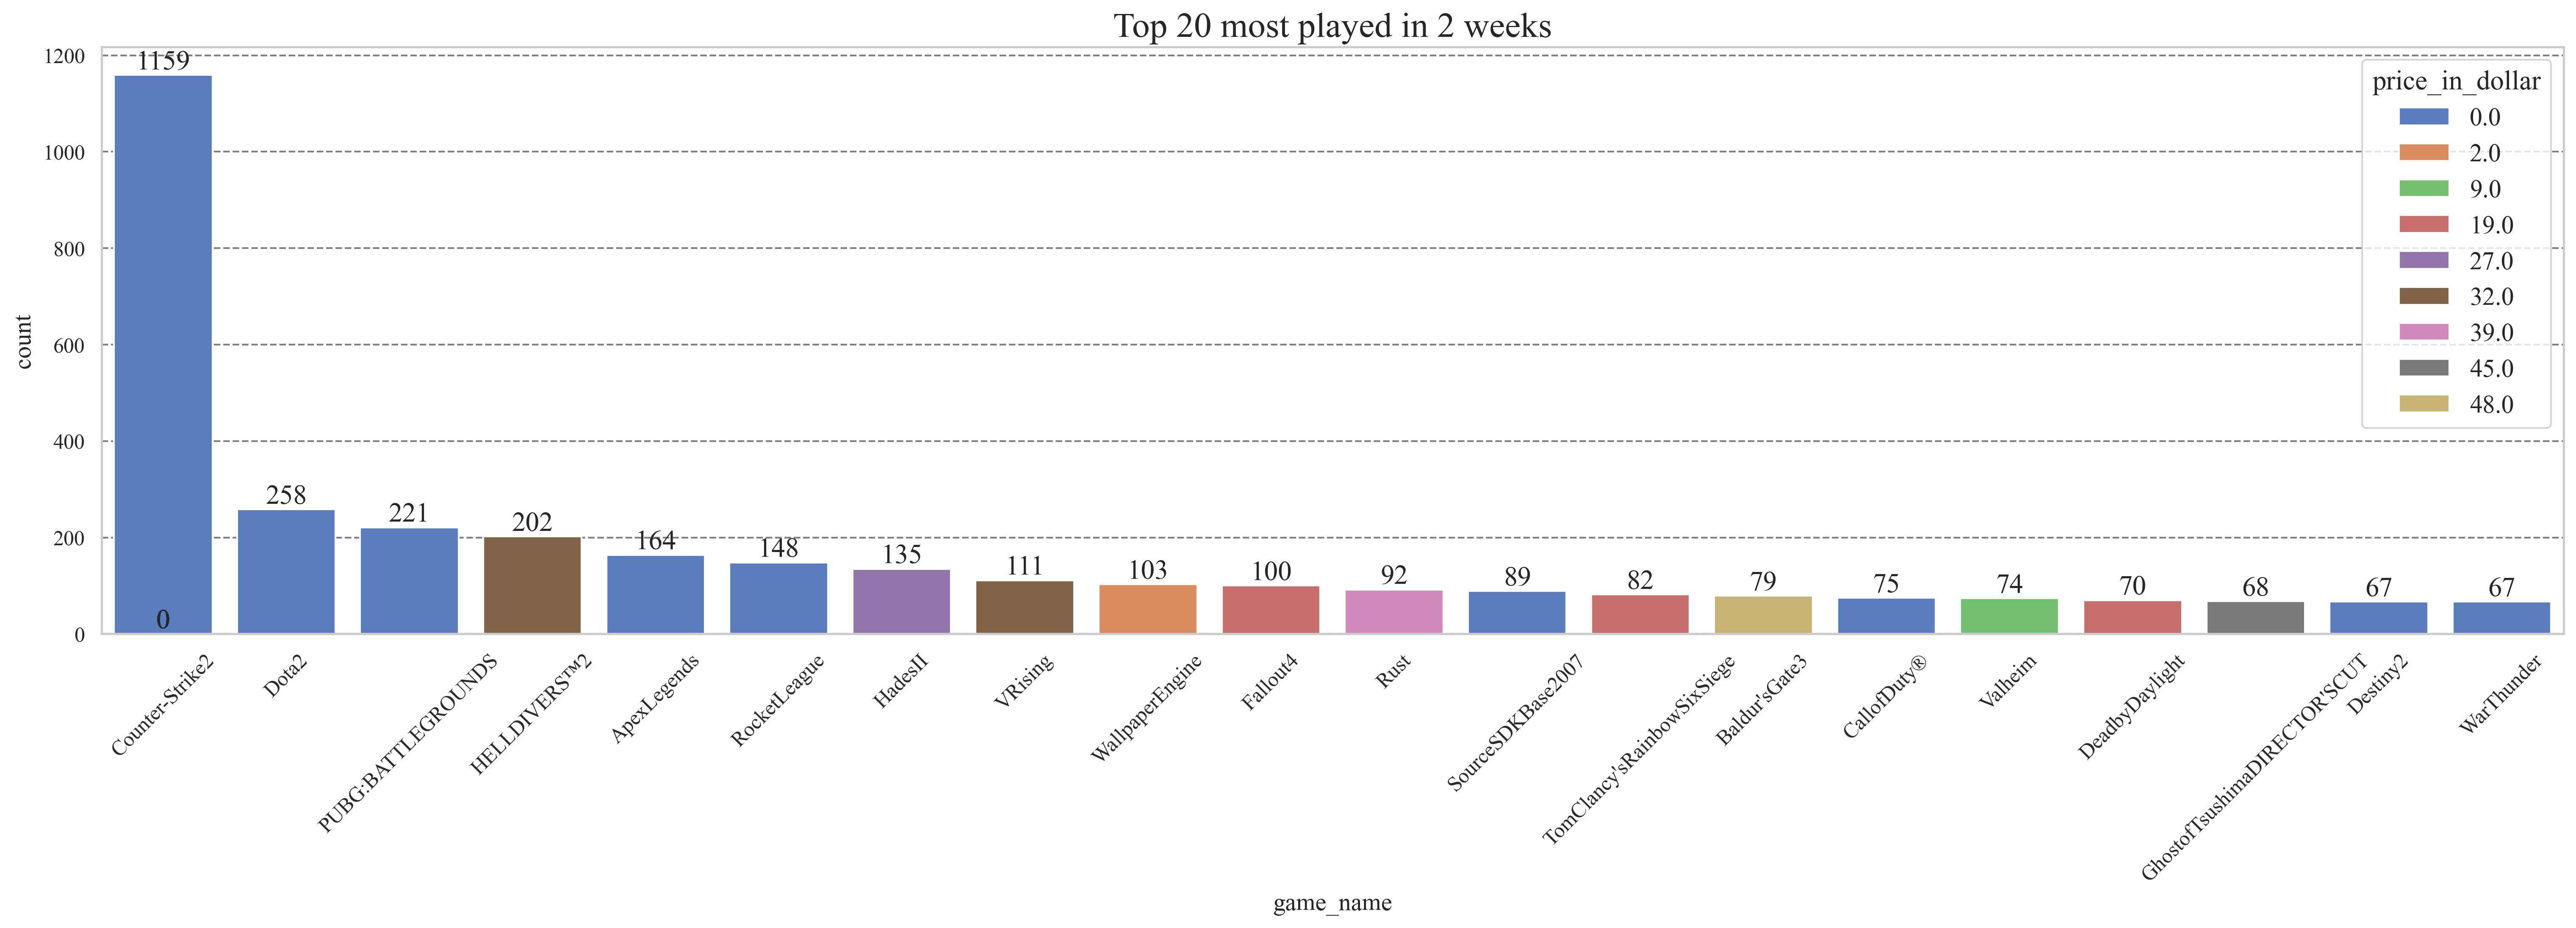

In [649]:
# 排序后查阅前20个游戏的上榜次数
plt.figure(figsize=(25,6))
plt.xticks(rotation = 45)
plt.title('Top 20 most played in 2 weeks')
ax = sns.barplot(data=top_hotest_2_weeks_games, x='game_name',y='count',hue='price_in_dollar',palette='muted',)

# 添加数签
for bar in ax.patches:  # ax.patches是条形图的集合
    ax.text(x = bar.get_x() + bar.get_width() / 2,  # x坐标，条形图中心
            y = bar.get_height(),  # y坐标，条形图顶部
            s = int(bar.get_height()),  # 标签，即条形图的高度，转换为整数
            ha='center',  # 水平居中,Horizontal Alignment（水平对齐）
            va='bottom')  # 从条形图顶部向下对齐,Vertical Alignment（垂直对齐）

<Axes: title={'center': 'Playtime Distribution of Top 20 Games in two weeks'}, xlabel='playtime_2weeks_in_minutes', ylabel='game_name'>

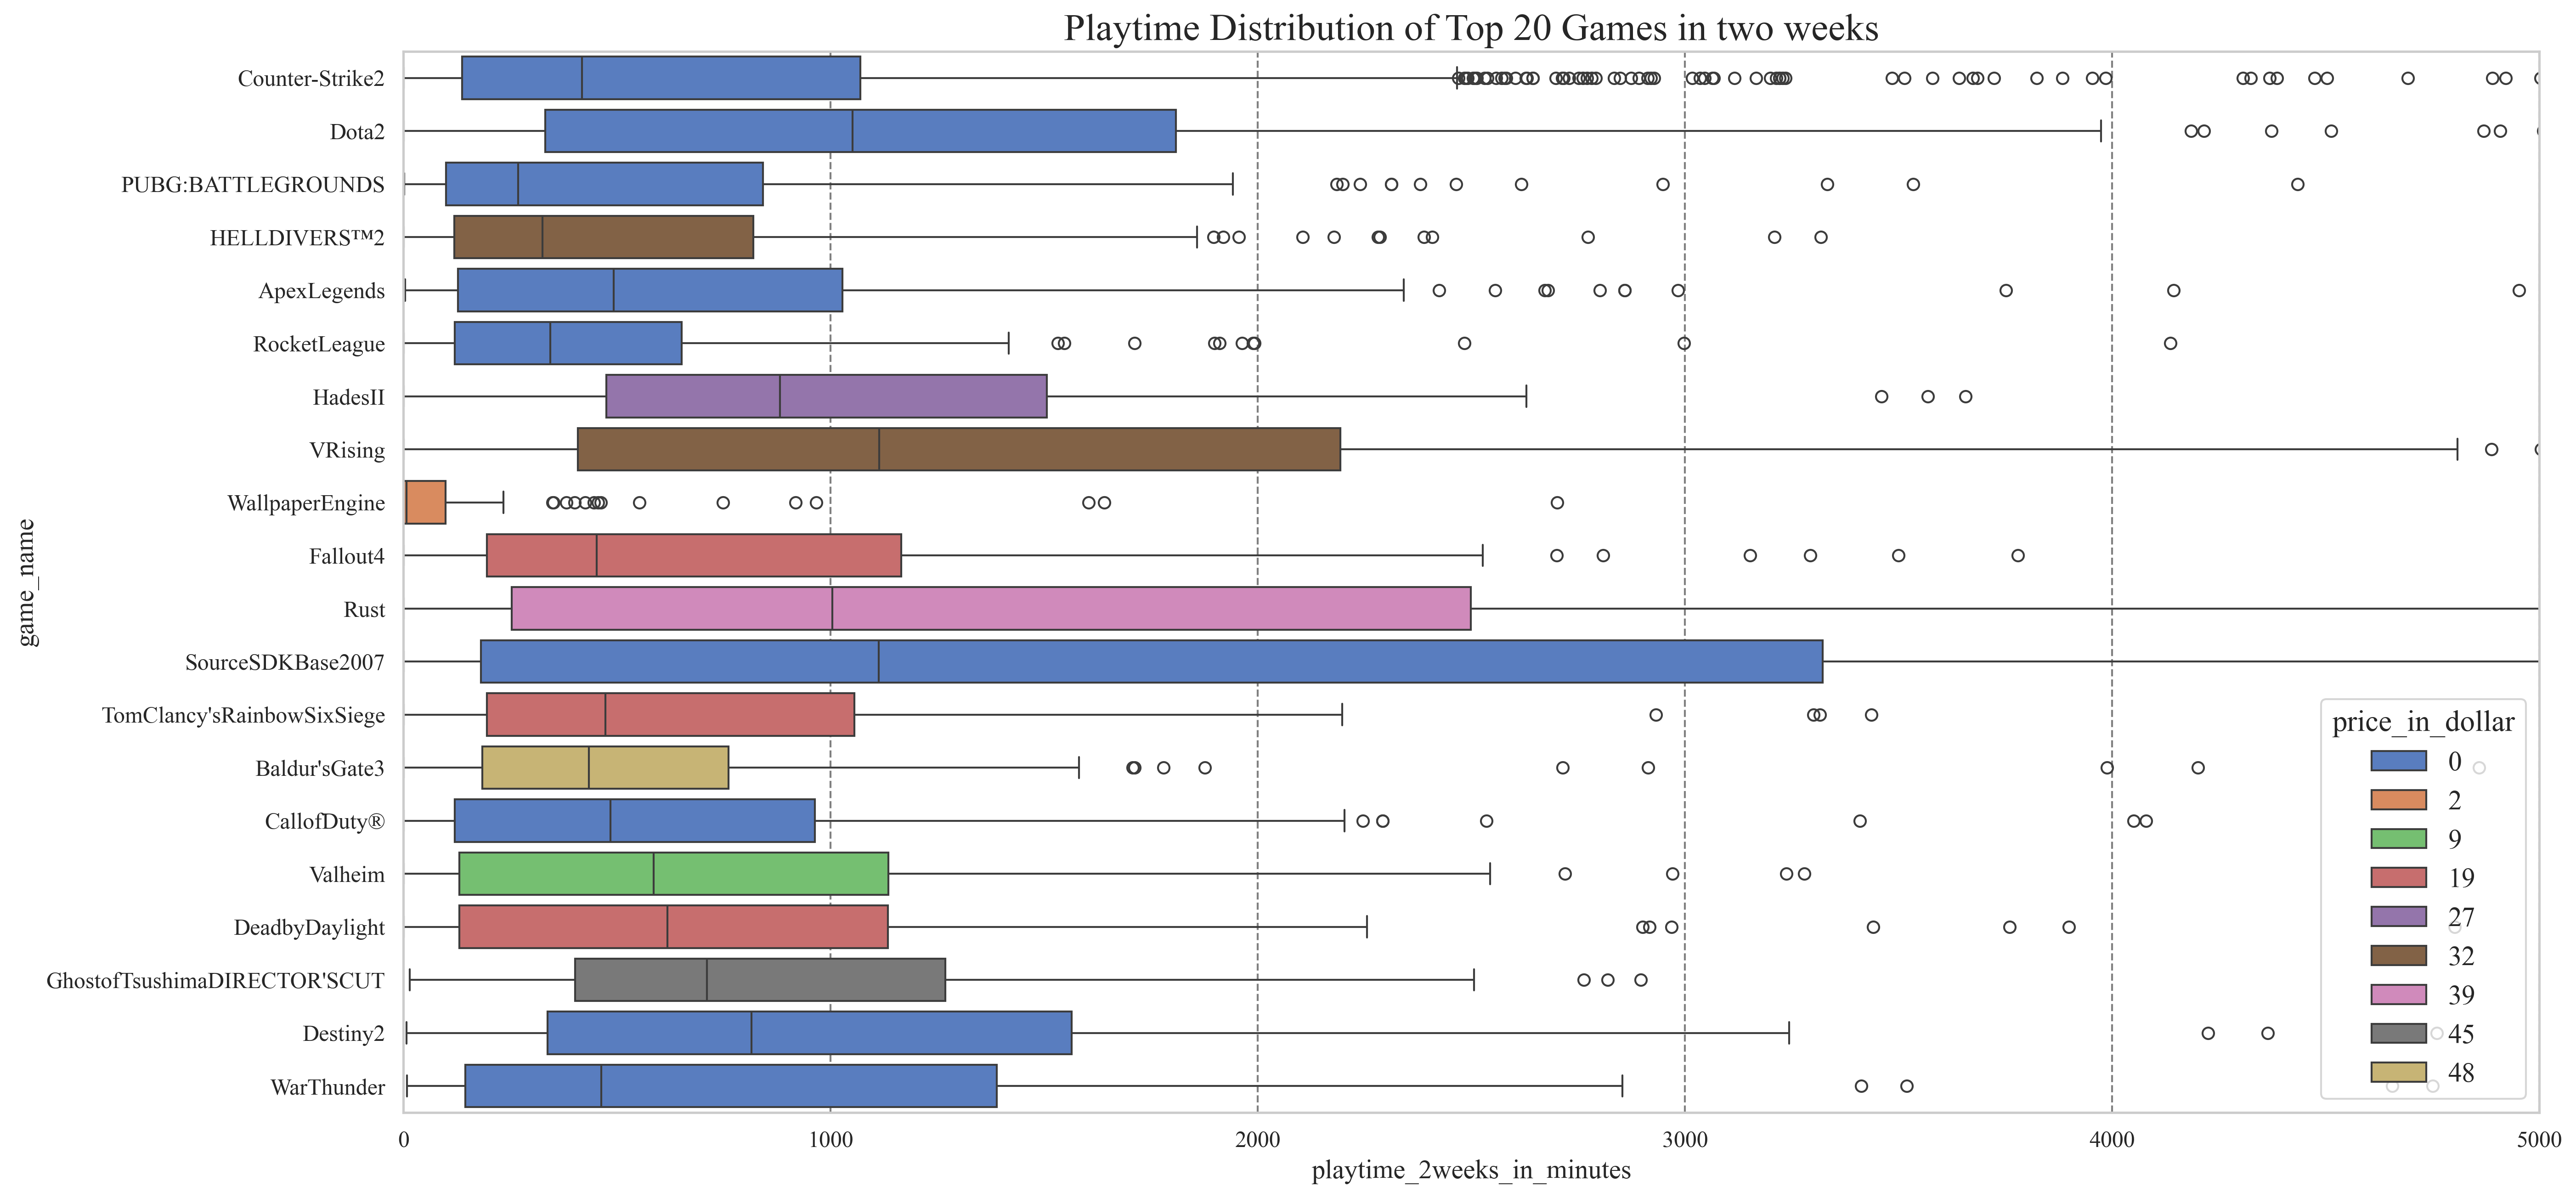

In [650]:
# 绘制箱型图，

# filter所有数据中排在counts前20的
top_20_games_data = game_info_2weeks_df[game_info_2weeks_df['game_name'].isin(top_hotest_2_weeks_games['game_name'])]
# 定义顺序，按照counts的大小从上到下依次排序
y_order = top_hotest_2_weeks_games['game_name']

plt.figure(figsize=(20, 10))
plt.title('Playtime Distribution of Top 20 Games in two weeks')
plt.xlim(0, 5000)
sns.boxplot(data=top_20_games_data, x='playtime_2weeks_in_minutes', y='game_name', hue='price_in_dollar',palette='muted',order=y_order)

### 多维度数据可视化——

17:appid_game1 18:name_game1 19:playtime_forever_game1
20:price_overview1 21:genres1 22:developers1 23:publishers1 24:categories1 
25:release_date1 26:metacritic1 27:appid_game2 28:name_game2 29:playtime_forever_game2 
30:price_overview2 31:genres2 32:developers2 33:publishers2 34:categories2 
35:release_date2 36:metacritic2 37:appid_game3 38:name_game3 39:playtime_forever_game3 
40:price_overview3 41:genres3 42:developers3 43:publishers3 44:categories3 
45:release_date3 46:metacritic3 47:appid_game4 48:name_game4 49:playtime_forever_game4 
50:price_overview4 51:genres4 52:developers4 53:publishers4 54:categories4 
55:release_date4 56:metacritic4 57:appid_game5 58:name_game5 59:playtime_forever_game5 
60:price_overview5 61:genres5 62:developers5 63:publishers5 64:categories5 
65:release_date5 66:metacritic5 


67:appid_game1_2weeks 68:name_game1_2weeks 69:playtime_2weeks_game1 
70:playtime_forever_game1_2weeks 71:steam_appid_2weeks_game_1 72:price_overview_2weeks_game_1 73:genres_2weeks_game_1 74:developers_2weeks_game_1 
75:publishers_2weeks_game_1 76:categories_2weeks_game_1 77:release_date_2weeks_game_1 78:metacritic_2weeks_game_1 79:appid_game2_2weeks 
80:name_game2_2weeks 81:playtime_2weeks_game2 82:playtime_forever_game2_2weeks 83:steam_appid_2weeks_game_2 84:price_overview_2weeks_game_2 
85:genres_2weeks_game_2 86:developers_2weeks_game_2 87:publishers_2weeks_game_2 88:categories_2weeks_game_2 89:release_date_2weeks_game_2 
90:metacritic_2weeks_game_2 91:appid_game3_2weeks 92:name_game3_2weeks 93:playtime_2weeks_game3 94:playtime_forever_game3_2weeks 
95:steam_appid_2weeks_game_3 96:price_overview_2weeks_game_3 97:genres_2weeks_game_3 98:developers_2weeks_game_3 99:publishers_2weeks_game_3 
100:categories_2weeks_game_3 101:release_date_2weeks_game_3 102:metacritic_2weeks_game_3

103:Unnamed: 0_y 104:Action_weighted_playtime (in_minutes) 
105:FreetoPlay_weighted_playtime (in_minutes) 106:Adventure_weighted_playtime (in_minutes) 107:Indie_weighted_playtime (in_minutes) 108:Racing_weighted_playtime (in_minutes) 109:Simulation_weighted_playtime (in_minutes) 
110:Sports_weighted_playtime (in_minutes) 111:MassivelyMultiplayer_weighted_playtime (in_minutes) 112:RPG_weighted_playtime (in_minutes) 113:Strategy_weighted_playtime (in_minutes) 114:Casual_weighted_playtime (in_minutes) 
115:total_price(dollar) 116:Principal Component 1 117:Principal Component 2 118:Principal Component 3 119:Cluster_Labels